In [334]:
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import numpy as np
import os
import anndata as ad


In [241]:
test = sc.read_h5ad('/home/jialiulab/disk1/yichun/FuseMap/input_data/mouse_tissue_type_integrate_test3/merfish_mouse_colitis_062221_D9_m3_2_slice_1.h5ad')

In [242]:
test.obs['y'].mean()

-780.1002576269227

In [243]:
test=test[test.obs['y'] >-770]

In [244]:
test

View of AnnData object with n_obs × n_vars = 11198 × 943
    obs: 'x', 'y', 'Mouse_ID', 'Technical_repeat_number', 'Sample_type', 'Slice_ID', 'FOV', 'Cell_ID', 'sample', 'N_genes', 'Tier1', 'Tier2', 'Tier3', 'Leiden_neigh', 'Neigh_umap_x', 'Neigh_umap_y', 'Tier2_umap_x', 'Tier2_umap_y', 'Tier3_umap_x', 'Tier3_umap_y', 'Tier1_umap_x', 'Tier1_umap_y', 'cell_type', 'tissue_region', 'organ', 'species', 'technology'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neigh_anndata', 'Sample_type_colors', 'Tier1_colors', 'Tier3_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial_input'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [245]:
test.write_h5ad('/home/jialiulab/disk1/yichun/FuseMap/input_data/mouse_tissue_type_integrate_test3/merfish_mouse_colitis_062221_D9_m3_2_slice_1.h5ad')

# integrate

In [335]:
path='/home/jialiulab/disk1/yichun/FuseMap/input_data/tissue_integrate_test3_llmcombine/'
X_input = []
file_names = [
    path + f
    for f in os.listdir(path)
    if os.path.isfile(os.path.join(path, f))
]

for ind, file_name_i in enumerate(file_names):
    X = sc.read_h5ad(file_name_i)
    print(file_name_i,X)
    # try:
    #     X.obs["x"] = X.obs["col"]
    #     X.obs["y"] = X.obs["row"]
    # except:
    #     print(file_name_i)
    # plt.figure()
    # plt.scatter(X.obs['x'],X.obs['y'],s=1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jialiulab/disk1/yichun/FuseMap/input_data/tissue_integrate_test3_llmcombine/'

### read single-cell embedding

In [352]:
save_dir = f"output/tissue_integrate_test3_llmcombine_1000/"

ad_embed_o=sc.read_h5ad(f'{save_dir}/ad_celltype_embedding.h5ad')


In [353]:
ad_embed=ad_embed_o

In [254]:
# ad_concat = []
# for i in ad_embed_o.obs['file_name'].unique():
#     ad_embed_i = ad_embed_o[ad_embed_o.obs['file_name']==i]
#     ad_embed_i_sample=ad_embed_i[np.random.permutation(ad_embed_i.obs.shape[0])[:10000],:]
#     ad_concat.append(ad_embed_i_sample)
# ad_embed = ad.concat(ad_concat)

In [354]:

# ad_embed=ad_embed_o[np.random.permutation(ad_embed_o.obs.shape[0])[:10000],:]

sc.pp.neighbors(ad_embed, n_neighbors=20,use_rep='X')

sc.tl.umap(ad_embed)


Text(0.5, 1.0, 'Single-cell embedding, colored by sample ID')

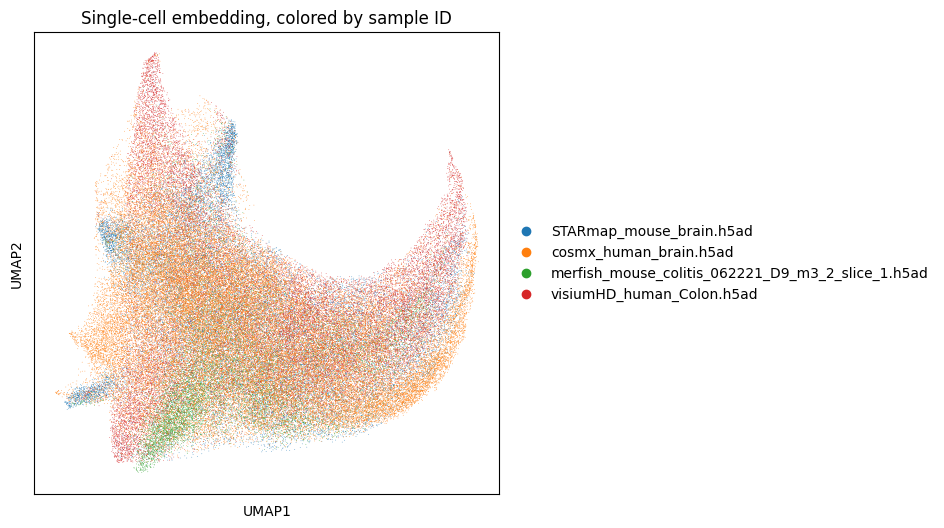

In [355]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sc.pl.umap(ad_embed,color='file_name',size=1, show=False,ax=ax)
ax.set_title('Single-cell embedding, colored by sample ID')

In [341]:
ad_embed.obs['file_name'].value_counts()

cosmx_human_brain.h5ad                               45180
visiumHD_human_Colon.h5ad                            26556
STARmap_mouse_brain.h5ad                             20857
merfish_mouse_colitis_062221_D9_m3_2_slice_1.h5ad    11198
Name: file_name, dtype: int64

In [290]:
ad_embed.obs.loc[ad_embed.obs['batch']=='sample0','organ']='Brain'
ad_embed.obs.loc[ad_embed.obs['batch']=='sample0','species']='Mouse'

Text(0.5, 1.0, 'Single-cell embedding, colored by sample ID')

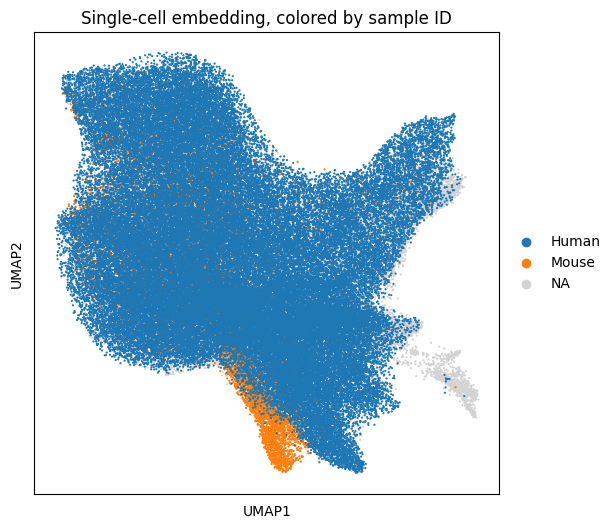

In [342]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sc.pl.umap(ad_embed,color='species',size=10, show=False,ax=ax)
ax.set_title('Single-cell embedding, colored by sample ID')

Text(0.5, 1.0, 'Single-cell embedding, colored by sample ID')

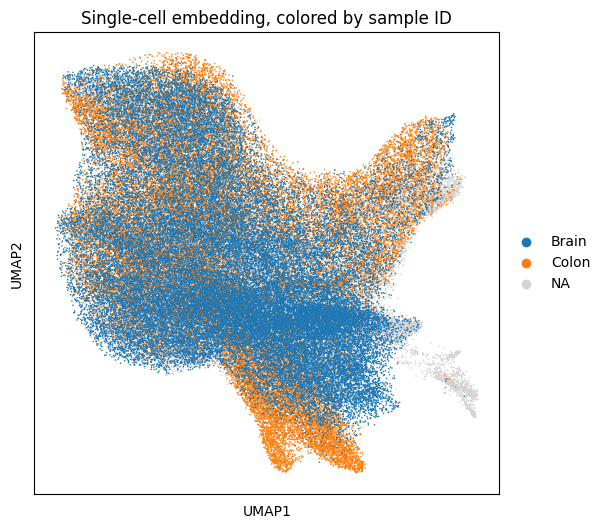

In [345]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sc.pl.umap(ad_embed,color='organ',size=5, show=False,ax=ax)
ax.set_title('Single-cell embedding, colored by sample ID')

In [293]:
ad_embed_i = ad_embed[ad_embed.obs['file_name']=='cosmx_human_Lung5_Rep1.h5ad']

In [ ]:
ad

Text(0.5, 1.0, 'Single-cell embedding, colored by sample ID')

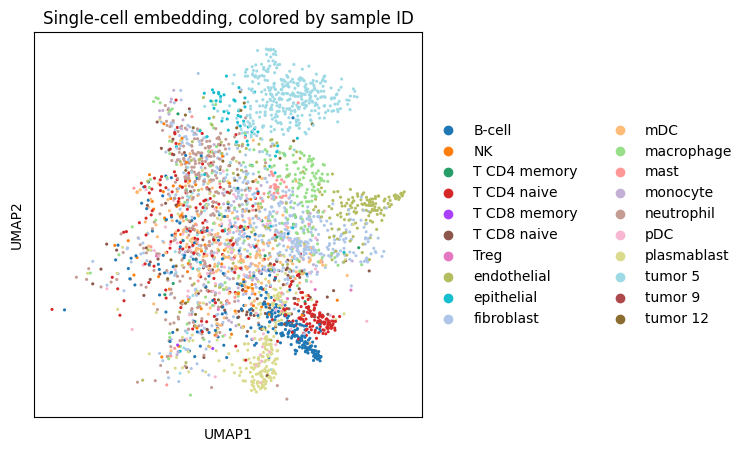

In [295]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sc.pl.umap(ad_embed_i,color='cell_type',size=20, show=False,ax=ax)
ax.set_title('Single-cell embedding, colored by sample ID')

### read spatial embedding

In [358]:
save_dir = f"output/tissue_integrate_test3_llmcombine_1000/"

ad_embed_o=sc.read_h5ad(f'{save_dir}/ad_tissueregion_embedding.h5ad')


In [357]:
ad_concat = []
for i in ad_embed_o.obs['file_name'].unique():
    ad_embed_i = ad_embed_o[ad_embed_o.obs['file_name']==i]
    ad_embed_i_sample=ad_embed_i[np.random.permutation(ad_embed_i.obs.shape[0])[:10000],:]
    ad_concat.append(ad_embed_i_sample)
ad_embed = ad.concat(ad_concat)

In [359]:
ad_embed=ad_embed_o

In [360]:

# ad_embed=ad_embed_o[np.random.permutation(ad_embed_o.obs.shape[0])[:10000],:]

sc.pp.neighbors(ad_embed, n_neighbors=20,use_rep='X')

sc.tl.umap(ad_embed)


Text(0.5, 1.0, 'Spatial embedding, colored by sample ID')

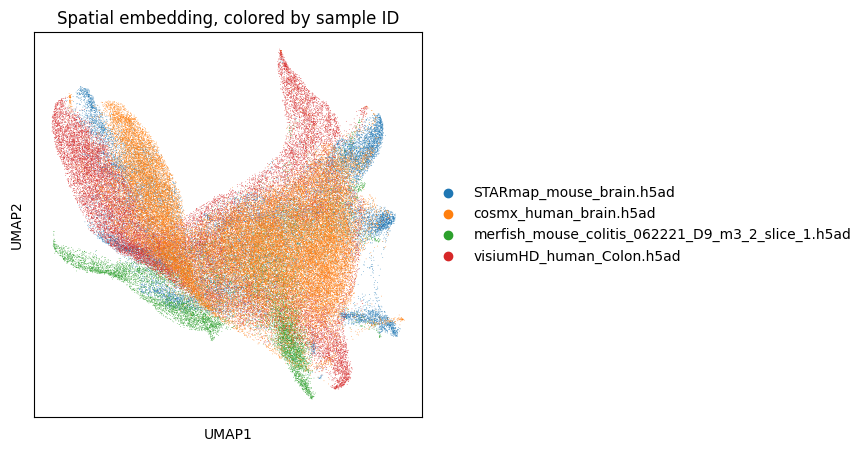

In [361]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sc.pl.umap(ad_embed,color='file_name',size=1, show=False,ax=ax)
ax.set_title('Spatial embedding, colored by sample ID')

In [120]:
import numpy as np
color_map=np.random.rand(ad_embed.obs['leiden'].nunique(),3)

dict_all={}
for i in range(ad_embed.obs['leiden'].nunique()):
    dict_all[ad_embed.obs['leiden'].cat.categories[i]]=color_map[i]

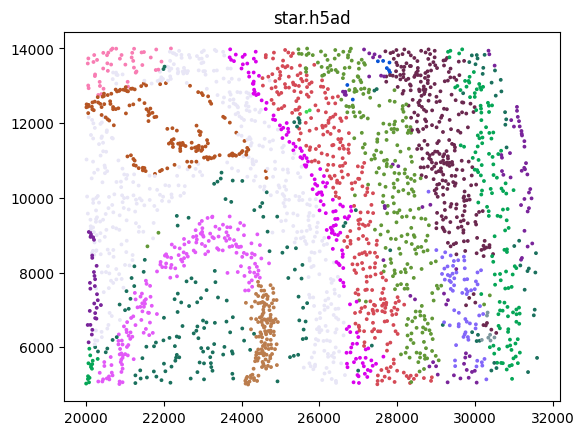

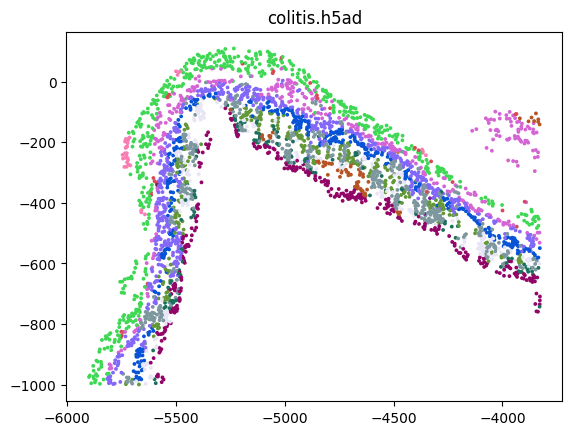

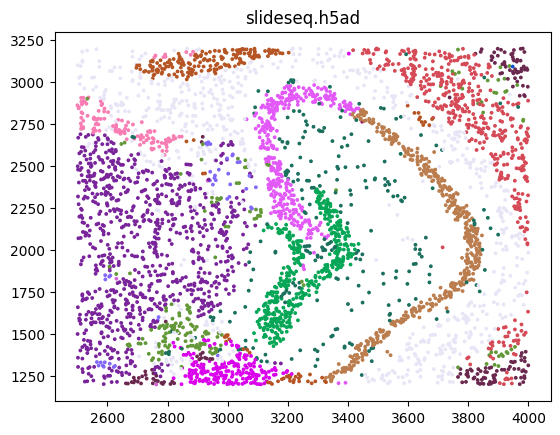

In [121]:
for ind in range(ad_embed.obs['batch'].nunique()):
    plt.figure()
    ad_plot=ad_embed[ad_embed.obs['batch']==f'sample{ind}']
    plt.scatter(ad_plot.obs['x'],
                ad_plot.obs['y'],
                c=[dict_all[i] for i in ad_plot.obs['leiden']],s=3)
    plt.title(ad_plot.obs['file_name'][0])

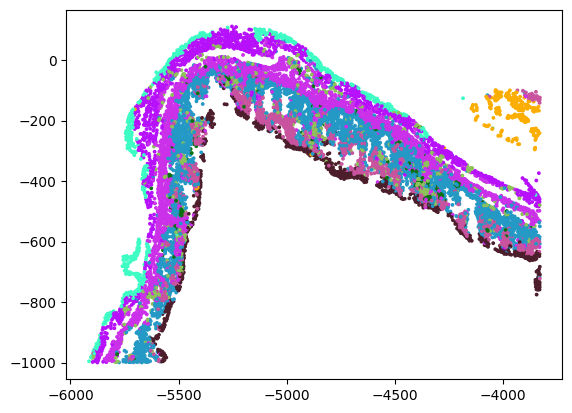

In [84]:
plt.figure()
ad_plot=ad_embed[ad_embed.obs['batch']=='sample1']
plt.scatter(ad_plot.obs['x'],
            ad_plot.obs['y'],
            c=[dict_all[i] for i in ad_plot.obs['leiden']],s=3)


### read gene embedding

In [182]:
import scanpy as sc

save_dir = f"output/mouse_tissue_integrate_test3_llmcombine/"

ad_embed=sc.read_h5ad(f'{save_dir}/ad_gene_embedding.h5ad')

sc.pp.neighbors(ad_embed, n_neighbors=50,use_rep='X')

sc.tl.umap(ad_embed)


In [186]:
ad_embed.obs['type'] = 'type'+ad_embed.obs['type'].astype('str')

In [191]:
ad_embed_o[ad_embed_o.obs['batch']=='sample1'].obs

,x,y,name,batch,file_name,Mouse_ID,Technical_repeat_number,Sample_type,Slice_ID,FOV,...,gt_cell_type_sub,gt_tissue_region,gt_tissue_region_main,gt_tissue_region_sub,global_x,global_y,ccf_label,gtTaxonomyRank4,gtDescription,gtTissueRegion
MBASSdd83_AAAAAAAAAAAGTA-1,1262.1,3329.6,section1,sample1,slideseq_Puck40.h5ad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MBASSdd83_AAAAAAAAAATACT-1,4656.6,1230.5,section1,sample1,slideseq_Puck40.h5ad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MBASSdd83_AAAAAAAAACTGAA-1,4619.4,1618.0,section1,sample1,slideseq_Puck40.h5ad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MBASSdd83_AAAAAAACTGTTCA-1,1614.6,1472.8,section1,sample1,slideseq_Puck40.h5ad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MBASSdd83_AAAAACCCTCCTCT-1,3042.1,3460.5,section1,sample1,slideseq_Puck40.h5ad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBASSdd83_TTTTTTTTTGTGTA-1,2484.9,828.6,section1,sample1,slideseq_Puck40.h5ad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MBASSdd83_TTTTTTTTTTATTG-1,3712.8,1569.8,section1,sample1,slideseq_Puck40.h5ad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MBASSdd83_TTTTTTTTTTGAGT-1,1909.5,3818.2,section1,sample1,slideseq_Puck40.h5ad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MBASSdd83_TTTTTTTTTTGGTT-1,4595.3,4240.2,section1,sample1,slideseq_Puck40.h5ad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
ad_embed.obs

,sample0,sample1,sample2,sample3,type
0610009B22RIK,,sample_1,,,type_sample_1__
0610009E02RIK,,sample_1,,,type_sample_1__
0610009L18RIK,,sample_1,,,type_sample_1__
0610010F05RIK,,sample_1,,,type_sample_1__
0610012G03RIK,,sample_1,,,type_sample_1__
...,...,...,...,...,...
ZXDC,,sample_1,,,type_sample_1__
ZYG11B,,sample_1,,sample_3,type_sample_1__sample_3
ZYX,,sample_1,,sample_3,type_sample_1__sample_3
ZZEF1,,sample_1,,,type_sample_1__


Text(0.5, 1.0, 'Gene embedding, colored by sample ID')

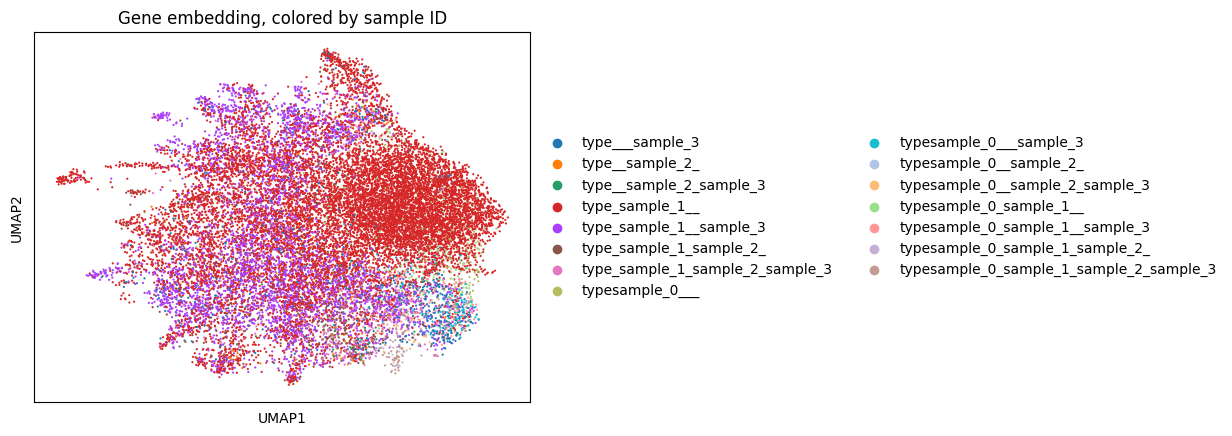

In [188]:

ax = sc.pl.umap(ad_embed,color='type', size=10,show=False)
ax.set_title('Gene embedding, colored by sample ID')


# map

Text(0.5, 1.0, 'Single-cell embedding, colored by sample ID')

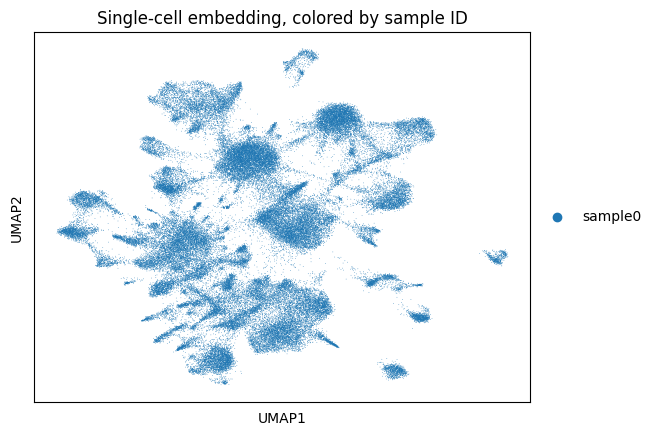

In [34]:
import scanpy as sc

save_dir = f"output/tutorial_map2/"

ad_embed=sc.read_h5ad(f'{save_dir}/ad_celltype_embedding.h5ad')

sc.pp.neighbors(ad_embed, n_neighbors=50,use_rep='X')

sc.tl.umap(ad_embed)


ax = sc.pl.umap(ad_embed,color='batch',size=1, show=False)
ax.set_title('Single-cell embedding, colored by sample ID')

In [35]:
ad_embed

AnnData object with n_obs × n_vars = 83546 × 64
    obs: 'x', 'y', 'name', 'batch', 'fusemap_celltype'
    uns: 'neighbors', 'umap', 'batch_colors'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

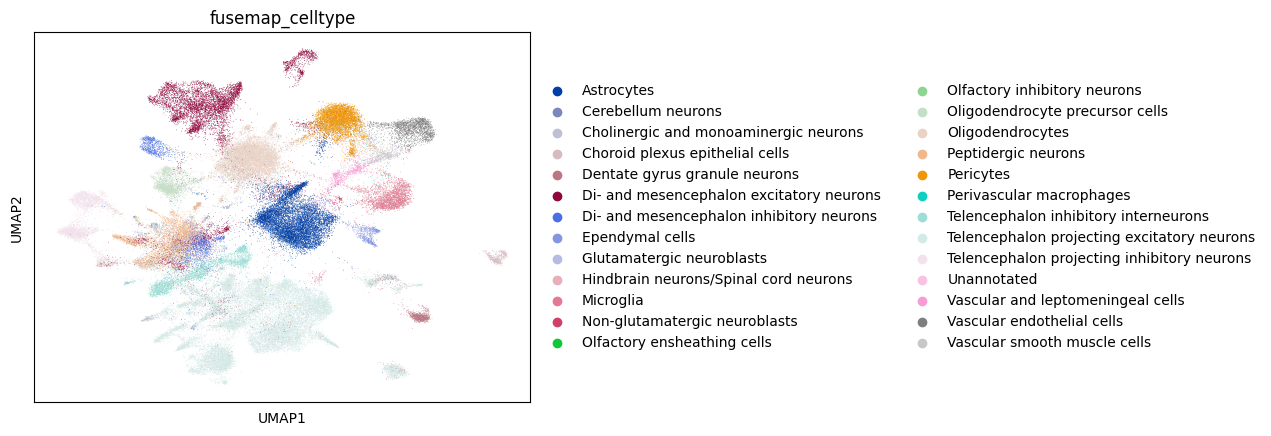

In [36]:
sc.pl.umap(ad_embed,color='fusemap_celltype',size=1)

/home/jialiulab/.conda/envs/fusemap_glue/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Text(0.5, 1.0, 'Single-cell embedding, colored by sample ID')

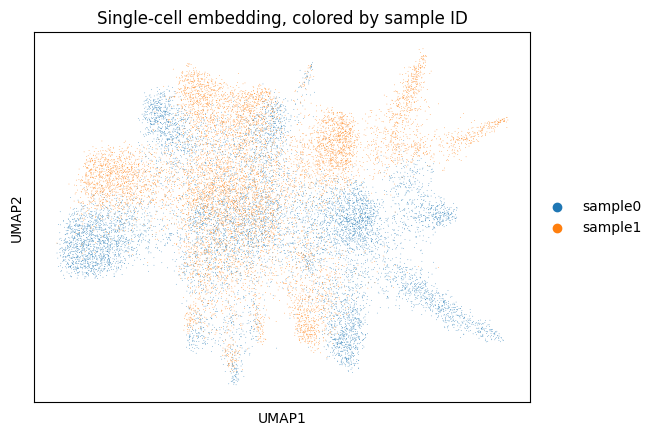

In [46]:
import scanpy as sc

save_dir = f"output/AD_map2/"

ad_embed=sc.read_h5ad(f'{save_dir}/ad_celltype_embedding.h5ad')

sc.pp.neighbors(ad_embed, n_neighbors=50,use_rep='X')

sc.tl.umap(ad_embed)


ax = sc.pl.umap(ad_embed,color='batch',size=1, show=False)
ax.set_title('Single-cell embedding, colored by sample ID')

/home/jialiulab/.conda/envs/fusemap_glue/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/jialiulab/.conda/envs/fusemap_glue/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0.5, 1.0, 'Single-cell embedding, colored by sample ID')

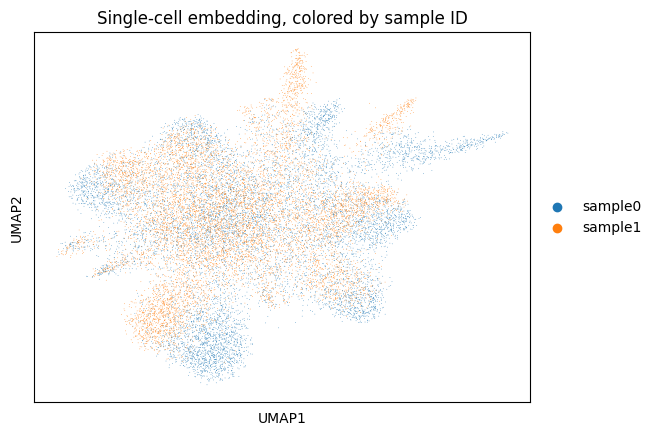

In [1]:
import scanpy as sc

save_dir = f"output/AD_map1/"

ad_embed=sc.read_h5ad(f'{save_dir}/ad_celltype_embedding.h5ad')

sc.pp.neighbors(ad_embed, n_neighbors=50,use_rep='X')

sc.tl.umap(ad_embed)


ax = sc.pl.umap(ad_embed,color='batch',size=1, show=False)
ax.set_title('Single-cell embedding, colored by sample ID')

In [48]:
ad_embed

AnnData object with n_obs × n_vars = 19062 × 64
    obs: 'x', 'y', 'name', 'batch', 'top_level_cell_type', 'fusemap_celltype'
    uns: 'neighbors', 'umap', 'batch_colors', 'fusemap_celltype_colors'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'